In [171]:
import pandas as pd, numpy as np, string, re
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.font_manager as fm 
from datetime import timedelta, datetime as dt
import matplotlib.gridspec as gridspec
%matplotlib inline
# %matplotlib notebook

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [4]:
def get_colors(cmap, n, start=0.0, stop=1.0, alpha=1.0, reverse=False):
    import matplotlib.cm as cm, numpy as np 
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [4]:
artists_most = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena_top_artists.csv')

In [5]:
artists_most = artists_most.set_index('artist')['play_count'].head(25)

In [6]:
artists_most.head()

artist
John Mayer         6920
Radiohead          6010
Porcupine Tree     2146
The Paper Kites    1876
Steven Wilson      1702
Name: play_count, dtype: int64

In [7]:
artists_most

artist
John Mayer               6920
Radiohead                6010
Porcupine Tree           2146
The Paper Kites          1876
Steven Wilson            1702
The Seatbelts            1473
Blackfield               1455
Tycho                    1245
Muse                     1114
Red Hot Chili Peppers    1083
The Killers              1027
The Pineapple Thief      1011
::M∆DE::IN::HEIGHTS::     987
City and Colour           842
Owl City                  823
The Midnight              710
Eden                      651
Alvvays                   644
Bryan Adams               571
The xx                    531
Oh Wonder                 479
Tomohito Nishiura         440
Brolly                    434
The Kooks                 429
Cake                      415
Name: play_count, dtype: int64

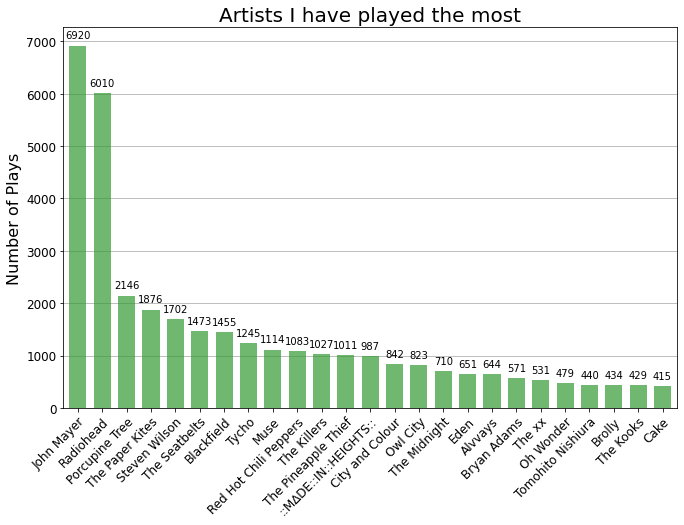

In [8]:
ax = artists_most.plot(kind = 'bar', figsize = (11,7), width=0.7, alpha=0.7, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode = 'anchor', ha='right', fontproperties=ticks_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)

ax.set_xlabel('', fontproperties = label_font)
ax.set_ylabel('Number of Plays', fontproperties=label_font)

plt.savefig('images/sidsaxena-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [9]:
tracks_most = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena_top_tracks.csv')

In [10]:
# if name too long, shorten it
def make_label(row, maxlength = 30, suffix= '...'):
    artist = row['artist']
    track = row['track']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength - len(suffix)], suffix)
    
    return '{}\n{}'.format(artist, track)

In [11]:
index = tracks_most.apply(make_label, axis='columns')

tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')

tracks_most = tracks_most['play_count'].head(20)

tracks_most.head()

The Paper Kites\nRevelator Eyes     327
Porcupine Tree\nTrains              221
The Paper Kites\nElectric Indigo    187
The Paper Kites\nBleed Confusion    172
Radiohead\nNo Surprises             164
Name: play_count, dtype: int64

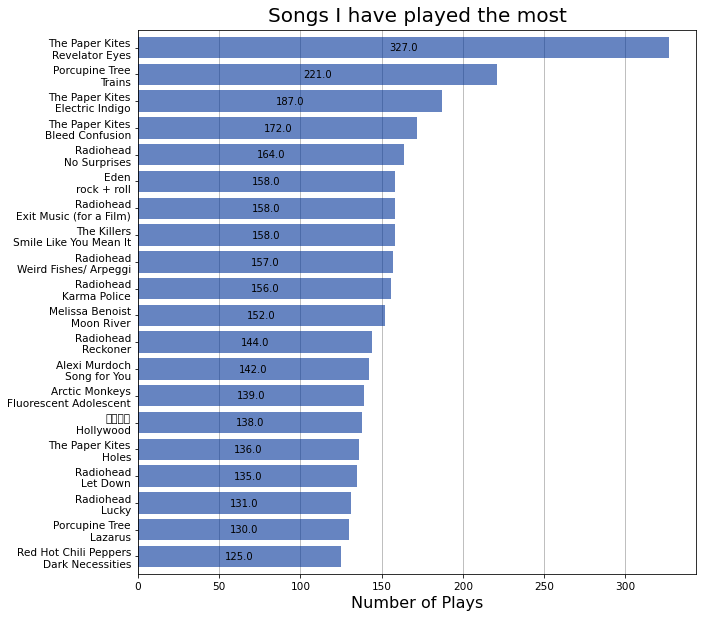

In [12]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=(10,10), width=0.8, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.xaxis.grid(True)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')

ax.set_xlabel('Number of Plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)

ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/sidsaxena-tracks-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [13]:
albums_most = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena_top_albums.csv')

In [14]:
def make_label(row, maxlength = 25, suffix='...'):
    artist = row['artist']
    track = row['album']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength - len(suffix)], suffix)
    return '{}\n{}'.format(artist, track)

index = albums_most.apply(make_label, axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

The Paper Kites\nTwelvefour              1193
Radiohead\nOK Computer                    875
John Mayer\nBorn and Raised               782
John Mayer\nWhere The Light Is: Jo...     727
John Mayer\nContinuum                     719
Name: play_count, dtype: int64

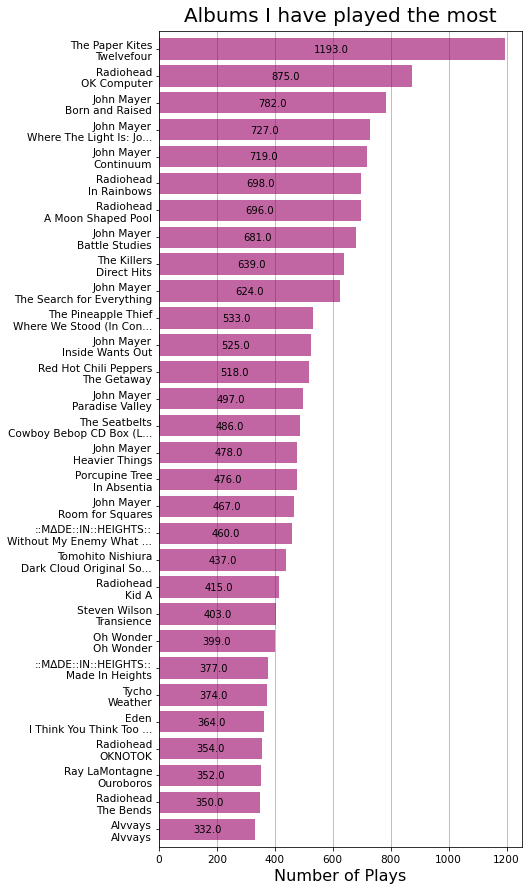

In [15]:
ax = albums_most.sort_values().plot(kind='barh', figsize=(6.5, 15), width=0.8, alpha=0.6, color='#990066', edgecolor=None, zorder=2)

ax.xaxis.grid(True)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')

ax.set_xlabel('Number of Plays', fontproperties = label_font)
ax.set_ylabel('', fontproperties=label_font)

ax.set_title('Albums I have played the most', fontproperties = title_font, y=1.005)

plt.savefig('images/sidsaxena-albums-played-most-h.png', dpi=96, bbox_inches='tight')

plt.show()

In [197]:
scrobbles = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/SidSaxena_scrobbles_2020-08-25.csv')

scrobbles = scrobbles.drop('timestamp', axis=1)

print('{:,} total scrobbles'.format(len(scrobbles)))
print('{:,} total artists'.format(len(scrobbles['artist'].unique())))

82,906 total scrobbles
5,445 total artists


In [198]:
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])
scrobbles = scrobbles.drop('datetime', axis=1)
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize('UTC')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_convert('Asia/Kolkata')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize(None)

In [199]:
scrobbles['year'] = scrobbles['timestamp'].apply(lambda time: time.year)
scrobbles['month'] = scrobbles['timestamp'].apply(lambda time: time.month)
scrobbles['year-month'] = scrobbles['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
scrobbles['day'] =  scrobbles['timestamp'].apply(lambda time: time.day)
scrobbles['hour'] = scrobbles['timestamp'].apply(lambda time: time.hour)
scrobbles['dow'] = scrobbles['timestamp'].apply(lambda time: time.dayofweek)


dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

scrobbles['dow'] = scrobbles['dow'].map(dmap)

In [200]:
scrobbles

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,year-month,day,hour,dow
0,Matt Berninger,991813f5-27c6-4ff3-88dd-90e750dad545,Serpentine Prison,beae8ac9-8ec6-4efa-83d4-0c7c0c4d9da0,Serpentine Prison,2305323b-6ce7-4622-aa38-f3273ba01fae,2020-08-25 16:55:07,2020,8,2020-08,25,16,1
1,Geotic,780640e6-cfcb-431f-b5a6-865200dd35a7,Traversa,944d9aa0-5cff-4ba3-9a9e-85116d6f8d98,Gondolier,ac762fe5-677b-40dd-bae2-ed279417eca6,2020-08-25 16:49:53,2020,8,2020-08,25,16,1
2,Sticky Fingers,1063a13c-9649-4e37-a816-3c0772129aba,Land Of Pleasure,8cc4a2b9-2e8d-42e2-8e0d-d9345b5d5492,Rum Rage,93bfb404-84cb-4ed7-9e75-e4f9ee98d37f,2020-08-25 16:45:45,2020,8,2020-08,25,16,1
3,Declan McKenna,8b98035f-fbd2-4fb3-9c2f-263c7506680d,MOOMINVALLEY (Official Soundtrack),NaN,In Blue,9e36db4a-8dab-4d5a-a692-7e0023dc4c6c,2020-08-25 16:40:56,2020,8,2020-08,25,16,1
4,Winnetka Bowling League,NaN,On The 5,05184a03-e807-4629-8265-4a650594f525,On The 5,73bf701b-b255-4aba-a546-9ffae186ab3f,2020-08-25 16:38:02,2020,8,2020-08,25,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82901,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 12:21:20,2016,10,2016-10,8,12,5
82902,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 12:18:06,2016,10,2016-10,8,12,5
82903,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 12:15:48,2016,10,2016-10,8,12,5
82904,Lauv,c0ef2ba5-a7b7-40ea-bd27-30acccfcac11,NaN,NaN,Breathe,a087c4ea-09bf-45f4-8989-15aaef1c7709,2016-10-08 12:13:52,2016,10,2016-10,8,12,5


In [82]:
year_counts = scrobbles['year'].value_counts().sort_index()

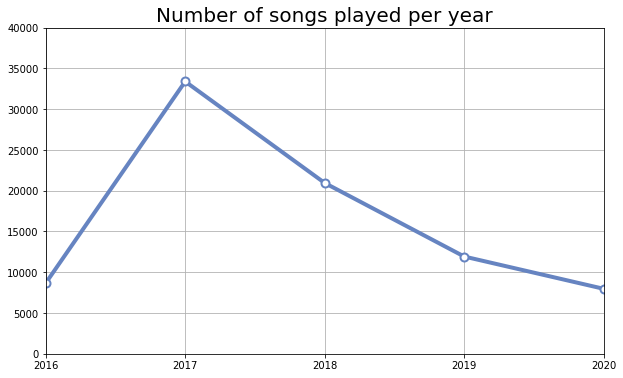

In [83]:
year_counts = scrobbles['year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=(10,6), linewidth=4, alpha=1, marker='o', color='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_ylim(0, 40000)
ax.set_xticks(year_counts.index)
ax.set_ylabel('', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)

ax.set_title('Number of songs played per year', fontproperties=title_font)

plt.savefig('images/sidsaxena-scrobbles-per-year', dpi=96, bbox_inches='tight')
plt.show()

In [84]:
min_year = min(scrobbles['year'])
max_year = max(scrobbles['year'])
years = scrobbles['year'].unique()[::-1].tolist()

In [85]:
month_counts = scrobbles['month'].value_counts().sort_index()
month_counts

1     7404
2     6060
3     8134
4     7022
5     6062
6     6149
7     6578
8     7441
9     6155
10    7582
11    6463
12    7856
Name: Month, dtype: int64

In [86]:
idx = []

In [87]:
for year in years:
    idx.append((scrobbles['month'][scrobbles['year'] == year]).value_counts().sort_index())

In [88]:
mcounts = pd.concat([idx[0], idx[1], idx[2], idx[3], idx[4]])

In [92]:
from collections import defaultdict
monthly_counts = defaultdict(list)

for i in range(len(idx)):
    for j in range(len(idx[i])):
        monthly_counts.setdefault(idx[i].index[j], []).append(idx[i].values[j])        

monthly_counts

defaultdict(list,
            {10: [1814, 2321, 2280, 1167],
             11: [2540, 2053, 1108, 762],
             12: [4309, 1851, 1232, 464],
             1: [2848, 2378, 1317, 861],
             2: [2350, 1483, 1173, 1054],
             3: [3751, 1322, 1530, 1531],
             4: [3372, 1780, 1010, 860],
             5: [2924, 1574, 586, 978],
             6: [3181, 1411, 701, 856],
             7: [3025, 1982, 636, 935],
             8: [3237, 2139, 1170, 895],
             9: [2483, 2260, 1412]})

In [93]:
date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range).tolist()
mcounts.index = index

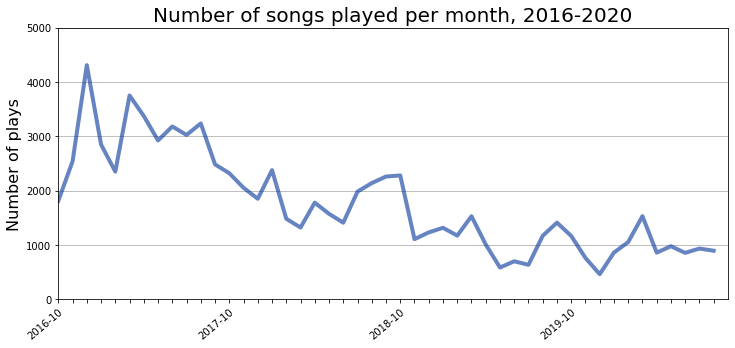

In [94]:
ax = mcounts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = mcounts.iloc[range(0, len(mcounts), 12)].index
xlabels = [x if x in xlabels else '' for x in mcounts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(mcounts)))

ax.yaxis.grid(True)
ax.set_ylim((0,5000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

In [201]:
month_counts = scrobbles['year-month'].value_counts().sort_index()

date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

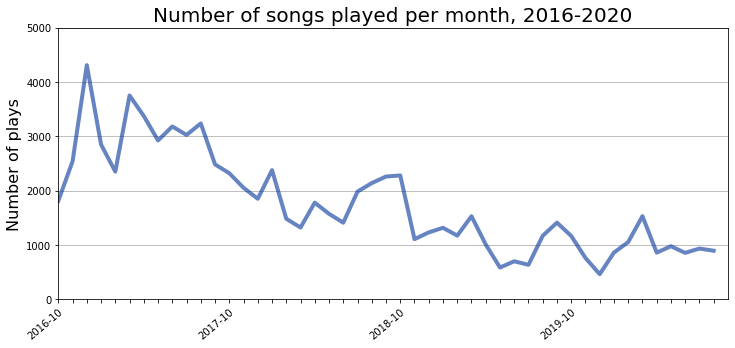

In [202]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)))

ax.yaxis.grid(True)
ax.set_ylim((0,5000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

In [95]:
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [96]:
dow_counts

Monday       11643
Tuesday      12240
Wednesday    12687
Thursday     12091
Friday       12060
Saturday     11017
Sunday       11168
Name: dow, dtype: int64

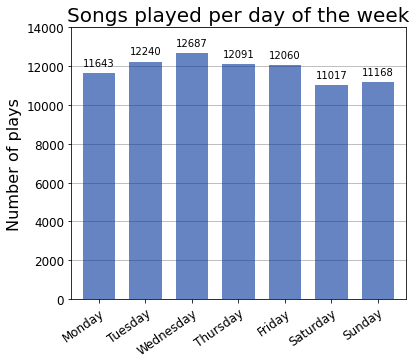

In [97]:
ax = dow_counts.plot(kind='bar', figsize=[6, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, 14000))
ax.set_title('Songs played per day of the week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('images/lastfm-scrobbles-per-weekday.png', dpi=96, bbox_inches='tight')
plt.show()

In [98]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
max(hour_counts)

6109

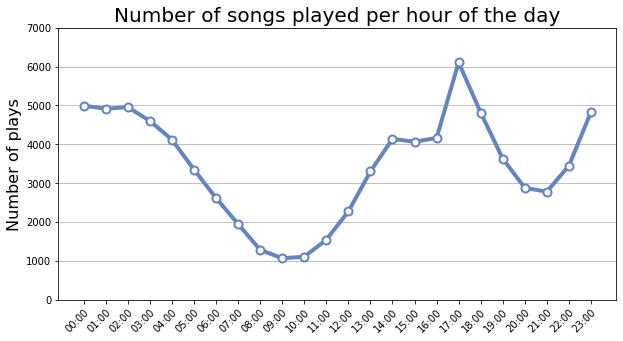

In [99]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0, 7000))

ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

In [117]:
day_hour_counts = scrobbles.groupby(['dow', 'hour']).count()['track']
hour_numbers = day_hour_counts.index.levels[1]
day_numbers = day_hour_counts.index.levels[0]
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [101]:
day_numbers

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dow')

In [144]:
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

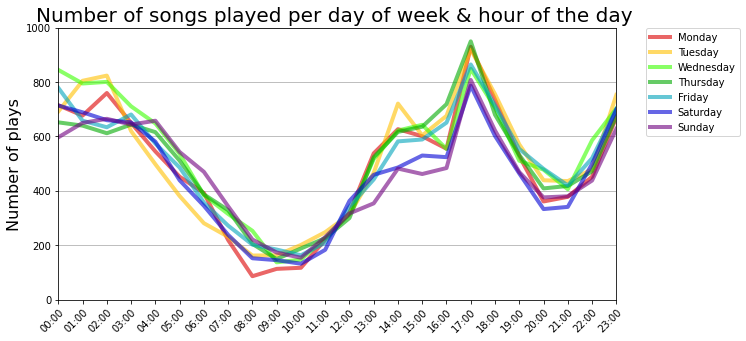

In [149]:
fig, ax = plt.subplots(figsize=[10, 6])
lines = []
for day, c in zip(day_numbers, colors):
    ax = day_hour_counts[day].plot(kind='line', figsize=[10, 5], linewidth=4, alpha=0.6, color=c)
    lines.append(day_names[day])

xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim(hour_numbers[0], hour_numbers[-1])

ax.yaxis.grid(True)

ax.set_ylim([0, 1000])
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per day of week & hour of the day ', fontproperties=title_font)

ax.legend(lines, loc='best', bbox_to_anchor=(1.23,1.017))

plt.savefig('images/lastfm-scrobbles-days-hours.png', dpi=96, bbox_inches='tight')
plt.show()

In [181]:
artists = scrobbles['artist'].value_counts()

artists = pd.DataFrame(artists.reset_index().rename(columns={'index': 'artist', 'artist': 'play count'}))

artists.index = [n + 1 for n in artists.index]
artists.head(25)

,artist,play count
1,John Mayer,6925
2,Radiohead,6011
3,Porcupine Tree,2148
4,The Paper Kites,1871
5,Steven Wilson,1702
6,The Seatbelts,1469
7,Blackfield,1456
8,Tycho,1245
9,Muse,1114
10,Red Hot Chili Peppers,1082


In [180]:
tracks = scrobbles.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)

tracks = tracks.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]

tracks.index = [n + 1 for n in tracks.index]

tracks.head(25)

,artist,track,play count
1,The Paper Kites,Revelator Eyes,328
2,Porcupine Tree,Trains,221
3,The Paper Kites,Electric Indigo,188
4,The Paper Kites,Bleed Confusion,172
5,Radiohead,No Surprises,164
6,The Killers,Smile Like You Mean It,158
7,Eden,rock + roll,158
8,Radiohead,Exit Music (for a Film),158
9,Radiohead,Weird Fishes/ Arpeggi,157
10,Radiohead,Karma Police,156


In [183]:
albums = scrobbles.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums = albums.reset_index().rename(columns={'timestamp': 'play count'})[['artist', 'album', 'play count']]
albums.index = [n+1 for n in albums.index]

In [185]:
albums.head(25)

,artist,album,play count
1,The Paper Kites,Twelvefour,1191
2,Radiohead,OK Computer,875
3,John Mayer,Born and Raised,782
4,John Mayer,Where The Light Is: John Mayer Live In Los Ang...,727
5,John Mayer,Continuum,722
6,Radiohead,In Rainbows,698
7,Radiohead,A Moon Shaped Pool,696
8,John Mayer,Battle Studies,682
9,The Killers,Direct Hits,640
10,John Mayer,The Search for Everything,624


In [204]:
scrobbles_month = scrobbles[scrobbles['year-month'].isin(['2017-03'])]

In [210]:
artists_month = scrobbles_month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Radiohead,810
2,John Mayer,589
3,The Seatbelts,429
4,Tomohito Nishiura,169
5,Owl City,91
6,Marcin Przybyłowicz,69
7,Muse,57
8,Adam Skorupa,52
9,Mikolai Stroinski,48
10,The Antlers,44


In [212]:
tracks_month = scrobbles_month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(25)

,artist,track,play count
1,Radiohead,No Surprises,48
2,The Seatbelts,Waltz For Zizi,45
3,Radiohead,Decks Dark,45
4,John Mayer,Wheel,35
5,John Mayer,Emoji of a Wave,32
6,John Mayer,In Repair,30
7,Radiohead,Everything in Its Right Place,27
8,Radiohead,Reckoner,27
9,The Seatbelts,Goodnight Julia,26
10,Radiohead,True Love Waits,26


In [213]:
albums_month = scrobbles_month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Radiohead,A Moon Shaped Pool,190
2,Tomohito Nishiura,Dark Cloud Original Soundtrack,169
3,The Seatbelts,Cowboy Bebop CD Box (Limited Edition),163
4,Radiohead,OK Computer,116
5,John Mayer,Where The Light Is: John Mayer Live In Los Ang...,107
6,John Mayer,Continuum,95
7,Radiohead,Kid A,88
8,John Mayer,Heavier Things,87
9,Radiohead,The Bends,79
10,The Seatbelts,Cowboy Bebop,73


In [271]:
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']

# make sure we have each year represented for each artist, even if they got no plays that year
plays = plays.unstack().T.fillna(method='ffill').T.stack()
top_artists = plays.index.levels[0]

In [272]:
colors = get_colors('Dark2', n)

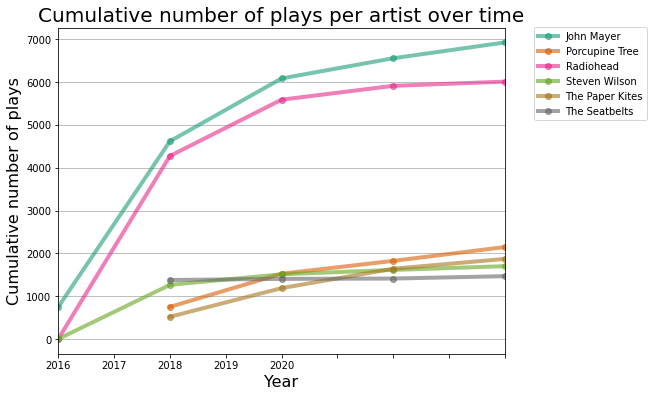

In [273]:
fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.33, 1.016))

plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

In [280]:
artists_clean = scrobbles['artist'].str.replace('The ','').str.replace('A ', '')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

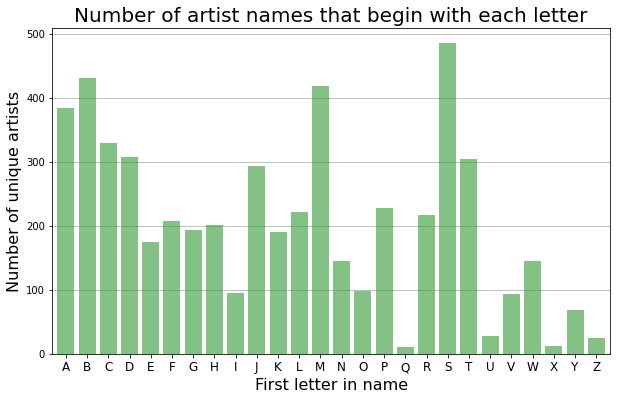

In [283]:
ax = first_letters.plot(kind='bar', figsize=[10,6], width = 0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)

ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')

plt.show()

In [286]:
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

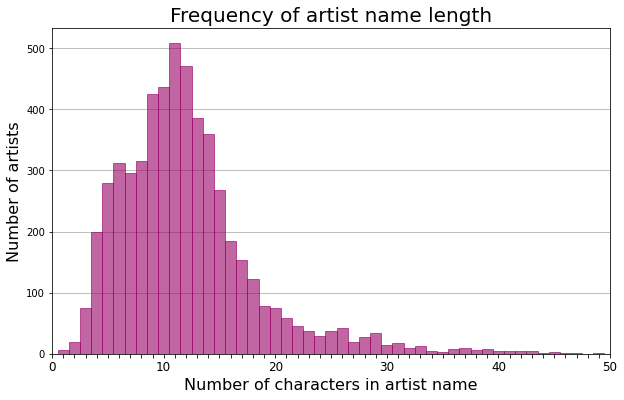

In [287]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()

In [5]:
features = pd.read_csv('/home/sid/development/python/music-analysis/spotify/Spreadsheets/Scrobbles with Features (69126).csv')

In [6]:
features['timestamp'] = pd.to_datetime(features['datetime'])
features = features.drop('datetime', axis=1)
features['timestamp'] = features['timestamp'].dt.tz_localize('UTC')
features['timestamp'] = features['timestamp'].dt.tz_convert('Asia/Kolkata')
features['timestamp'] = features['timestamp'].dt.tz_localize(None)

In [7]:
features['year'] = features['timestamp'].apply(lambda time: time.year)
features['month'] = features['timestamp'].apply(lambda time: time.month)
features['year-month'] = features['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
features['day'] =  features['timestamp'].apply(lambda time: time.day)
features['hour'] = features['timestamp'].apply(lambda time: time.hour)
features['dow'] = features['timestamp'].apply(lambda time: time.dayofweek)


dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# features['dow'] = features['dow'].map(dmap)

In [8]:
keymap = {0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭', 4: 'E/F♭', 5: 'F/E♯', 6: 'F♯/G♭', 7: 'G', 8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭',  11: 'B/C♭'}

features['key'] = features['key'].map(keymap)

In [9]:
features = features.set_index('timestamp')

In [10]:
seventeen = features['2017']
eighteen = features['2018']
nineteen = features['2019']

In [11]:
monthly_17 = seventeen.resample('M').mean()
monthly_18 = eighteen.resample('M').mean()
monthly_19 = nineteen.resample('M').mean()

In [12]:
mar_17 = features['2017-03']
apr_17 = features['2017-04']
may_17 = features['2017-05']

In [13]:
daily_mar = mar_17.resample('D').mean()
daily_apr = apr_17.resample('D').mean()
daily_may = may_17.resample('D').mean()

In [14]:
daily_apr = daily_apr.append(pd.Series(name='2017-04-31'))

In [15]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print('\n'.join(color for color in colors)) 

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


In [16]:
x_indexes = np.arange(len(daily_may))
width = 0.25

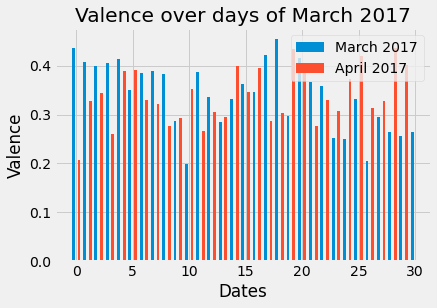

In [162]:
plt.bar(x_indexes - width, daily_mar['valence'], label='March 2017', width=width)
plt.title('Valence over days of March 2017')
plt.xlabel('Dates')
plt.ylabel('Valence')
plt.bar(x_indexes + width, daily_apr['valence'], label='April 2017', width=width)
# plt.tight_layout() 
plt.legend()

# plt.xticks(ticks=x_indexes, labels=samplemonth['day'][::-1])

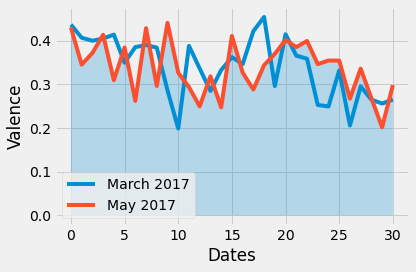

In [169]:
fig, ax = plt.subplots()
ax.plot(daily_mar['valence'].values, label='March 2017')
# ax.plot(daily_apr['valence'].values, label='April 2017')
ax.plot(daily_may['valence'].values, label='May 2017')

plt.xlabel('Dates')
plt.ylabel('Valence')

plt.fill_between(x_indexes, daily_may['valence'], alpha=0.25)

plt.tight_layout() 
plt.legend(loc='best')


In [147]:
x_indexes = np.arange(len(monthly_17))

In [148]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [149]:
mean_valence = features['valence'].mean()
mean_energy = features['energy'].mean()
mean_danceability = features['danceability'].mean()
mean_length = features['length in mins'].mean()

In [150]:
nums = x_indexes.tolist()

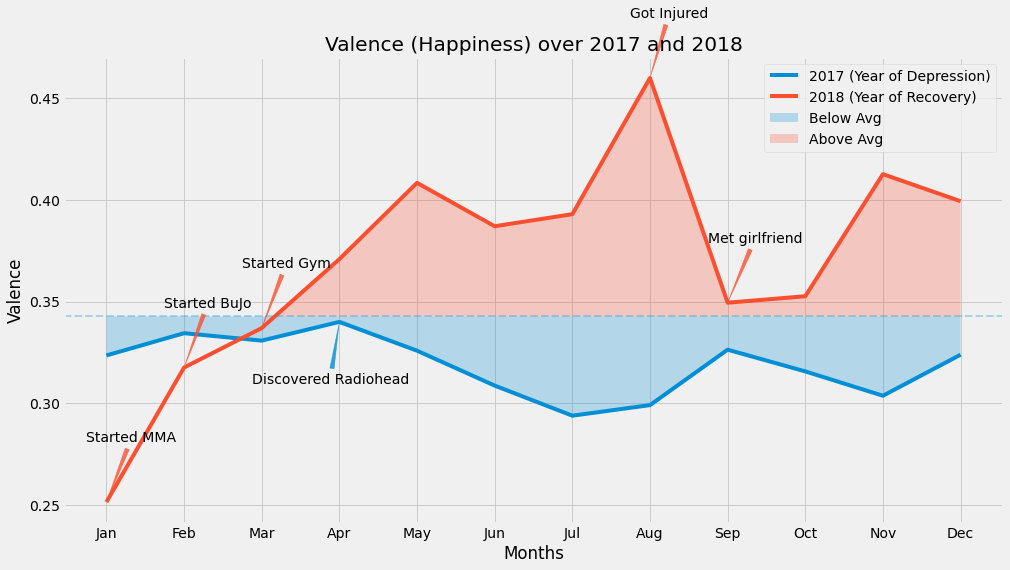

In [156]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(monthly_17['valence'].values, label='2017 (Year of Depression)')
ax.plot(monthly_18['valence'].values, label='2018 (Year of Recovery)')

plt.axhline(mean_valence, linestyle= '--', linewidth='2', alpha=0.3)

# ax.plot(monthly_19['valence'].values, label='2019')

ax.set_title('Valence (Happiness) over 2017 and 2018')

ax.set_xticks(nums)
ax.set_xticklabels(month_names)

plt.xlabel('Months')
plt.ylabel('Valence')

xticks18 = [0, 1, 2, 7, 8]
yticks18 = monthly_18['valence'].values
yticks18 = yticks18[xticks18]

for x,y in zip(xticks18,yticks18):

    label = {0: 'Started MMA', 1:'Started BuJo', 2: 'Started Gym', 7: 'Got Injured',8: 'Met girlfriend'}

    plt.annotate(label[x], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,60), # distance from text to points (x,y)
                 arrowprops = dict(facecolor='#fc4f30', color='#fc4f30', alpha=0.8, arrowstyle='wedge'))
                #  ha='center') # horizontal alignment can be left, right or center

yticks17 = monthly_17['valence'].values
yticks17 = yticks17[3]

plt.annotate('Discovered Radiohead',
                (3,yticks17),
                xytext=(0.2, 0.3), 
                textcoords="axes fraction",
                arrowprops= dict(facecolor='#008fd5', color='#008fd5', alpha=0.8, arrowstyle='wedge'))


plt.fill_between(x_indexes, monthly_17['valence'], mean_valence, where=(monthly_17['valence'] < mean_valence), label = 'Below Avg', interpolate=True, alpha=0.25)

plt.fill_between(x_indexes, monthly_18['valence'], mean_valence, where=(monthly_18['valence'] > mean_valence), label = 'Above Avg', interpolate=True, alpha=0.25)

plt.legend(loc='best')

# plt.tight_layout() 


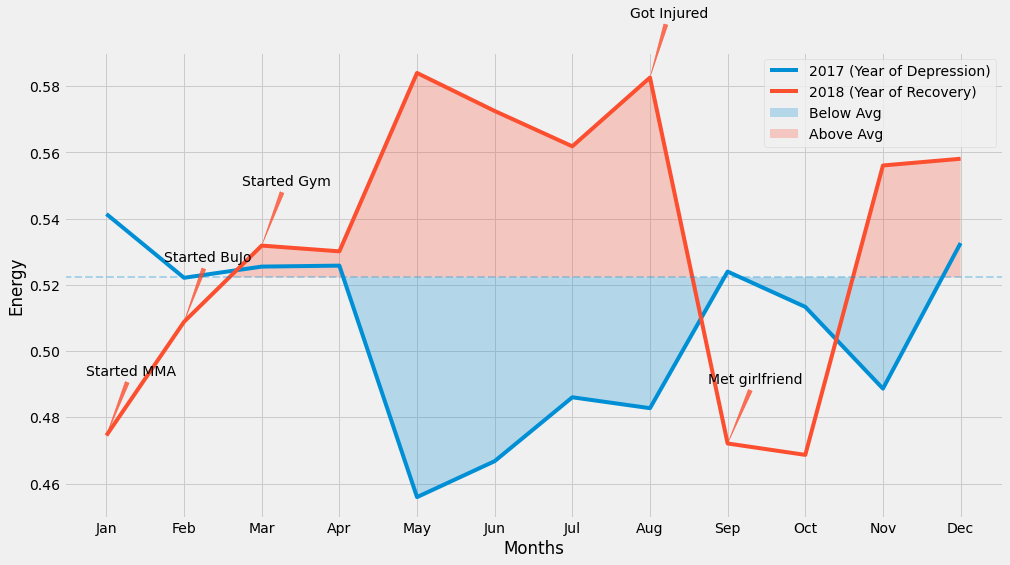

In [385]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(monthly_17['energy'].values, label='2017 (Year of Depression)')
ax.plot(monthly_18['energy'].values, label='2018 (Year of Recovery)')

plt.axhline(mean_energy, linestyle= '--', linewidth='2', alpha=0.3)

# ax.plot(monthly_19['energy'].values, label='2019')

ax.set_xticks(nums)
ax.set_xticklabels(month_names)

plt.xlabel('Months')
plt.ylabel('Energy')

xticks18 = [0, 1, 2, 7, 8]
yticks18 = monthly_18['energy'].values
yticks18 = yticks18[xticks18]

for x,y in zip(xticks18,yticks18):

    label = {0: 'Started MMA', 1:'Started BuJo', 2: 'Started Gym', 7: 'Got Injured',8: 'Met girlfriend'}

    plt.annotate(label[x], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,60), # distance from text to points (x,y)
                 arrowprops = dict(facecolor='#fc4f30', color='#fc4f30', alpha=0.8, arrowstyle='wedge'))
                #  ha='center') # horizontal alignment can be left, right or center

yticks17 = monthly_17['valence'].values
yticks17 = yticks17[3]

# plt.annotate('Discovered Radiohead',
#                 (3,yticks17),
#                 xytext=(0.2, 0.3), 
#                 textcoords="offset points",
#                 arrowprops= dict(facecolor='#008fd5', color='#008fd5', alpha=0.8, arrowstyle='wedge'))


plt.fill_between(x_indexes, monthly_17['energy'], mean_energy, where=(monthly_17['energy'] < mean_energy), label = 'Below Avg', interpolate=True, alpha=0.25)

plt.fill_between(x_indexes, monthly_18['energy'], mean_energy, where=(monthly_18['energy'] > mean_energy), label = 'Above Avg', interpolate=True, alpha=0.25)


plt.legend(loc='best')

# plt.tight_layout() 


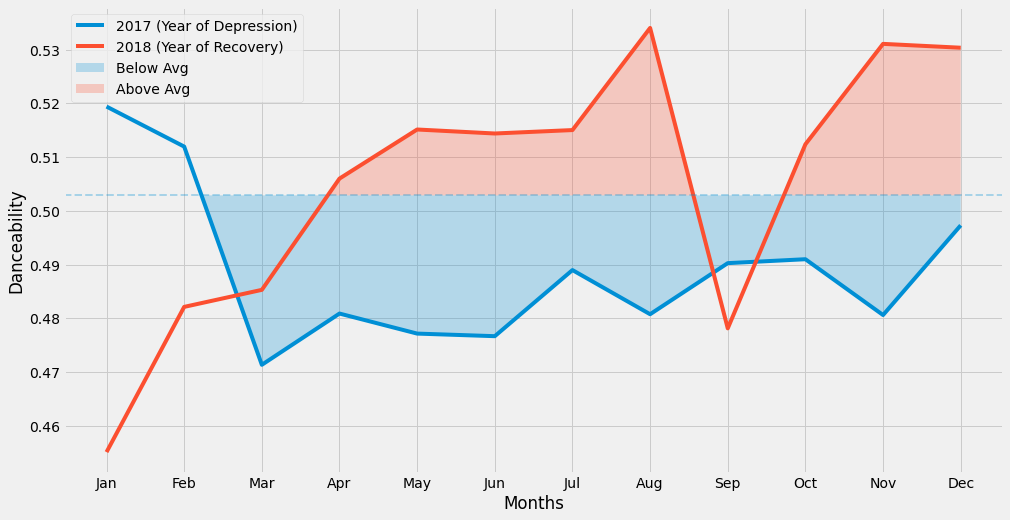

In [394]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(monthly_17['danceability'].values, label='2017 (Year of Depression)')
ax.plot(monthly_18['danceability'].values, label='2018 (Year of Recovery)')

plt.axhline(mean_danceability, linestyle= '--', linewidth='2', alpha=0.3)

# ax.plot(monthly_19['danceability'].values, label='2019')

ax.set_xticks(nums)
ax.set_xticklabels(month_names)

plt.xlabel('Months')
plt.ylabel('Danceability')

xticks18 = [0, 1, 2, 7, 8]
yticks18 = monthly_18['danceability'].values
yticks18 = yticks18[xticks18]

plt.fill_between(x_indexes, monthly_17['danceability'], mean_danceability, where=(monthly_17['danceability'] < mean_danceability), label = 'Below Avg', interpolate=True, alpha=0.25)

plt.fill_between(x_indexes, monthly_18['danceability'], mean_danceability, where=(monthly_18['danceability'] > mean_danceability), label = 'Above Avg', interpolate=True, alpha=0.25)


plt.legend(loc='best')

# plt.tight_layout() 


In [19]:
album_counts = features['album'].value_counts().head(10)

In [20]:
album_counts

OK Computer                    1197
twelvefour                     1090
The Search for Everything       833
In Rainbows                     799
Born and Raised                 748
A Moon Shaped Pool              695
Battle Studies                  684
Continuum                       664
In Absentia                     524
Where We Stood (In Concert)     519
Name: album, dtype: int64

In [21]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0) 

([<matplotlib.patches.Wedge at 0x7fdec01d2c40>,
 [Text(0.32545245914217674, 1.0507524431750372, 'OK Computer'),
  Text(-0.7034330699066316, 0.9722046678358071, 'twelvefour'),
  Text(-1.0850196402981915, 0.18092092241414007, 'The Search for Everything'),
  Text(-0.9674015534585637, -0.5235782982190513, 'In Rainbows'),
  Text(-0.4763395884072215, -0.9915142946604647, 'Born and Raised'),
  Text(0.15007615074766076, -1.0897142510661983, 'A Moon Shaped Pool'),
  Text(0.7049681013304053, -0.8444051018951767, 'Battle Studies'),
  Text(1.041027691638714, -0.35533272469809285, 'Continuum'),
  Text(1.0872404671364626, 0.16705737523643424, 'In Absentia'),
  Text(0.923055142537836, 0.5983052764554693, 'Where We Stood (In Concert)')],
 [Text(0.17751952316846, 0.573137696277293, '15.4%'),
  Text(-0.4103359574455351, 0.5671193895708874, '14.1%'),
  Text(-0.5918288947081044, 0.09868413949862186, '10.7%'),
  Text(-0.527673574613762, -0.2855881626649371, '10.3%'),
  Text(-0.25982159367666624, -0.5408259

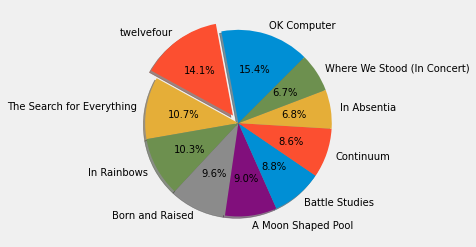

In [117]:
plt.pie(album_counts, startangle=45, labels=album_counts.index, textprops={'fontsize': 10}, autopct='%1.1f%%', explode=explode, shadow=True)

In [426]:
features['key'].value_counts()

D        9230
C        8479
A        7856
G        7491
E/F♭     6590
F/E♯     5415
C♯/D♭    5282
B/C♭     5172
F♯/G♭    4264
A♯/B♭    3534
G♯/A♭    3447
D♯/E♭    2366
Name: key, dtype: int64

In [94]:
x_indexes = np.arange(len(daily_may))
width = 0.25

In [109]:
sample = features.sample(1000)
dupes = features.reset_index()
dupes.drop('timestamp', axis=1, inplace=True)
dupes.drop_duplicates(inplace=True)

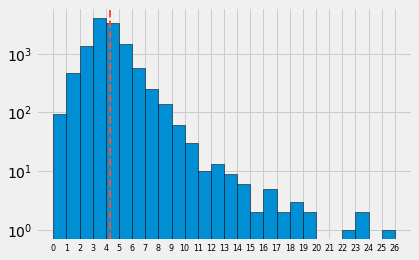

In [143]:
fig, ax = plt.subplots()
bins = np.arange(0, 27, 1)
ax.hist(dupes['length in mins'], edgecolor='black', bins=bins, log=True)
ax.axvline(mean_length, color='#fc4f30', label='Mean Length', linewidth=2, ls='--')

ax.set_xticks(bins)
ax.set_xticklabels(bins, fontdict=dict(fontsize=8))
plt.show()

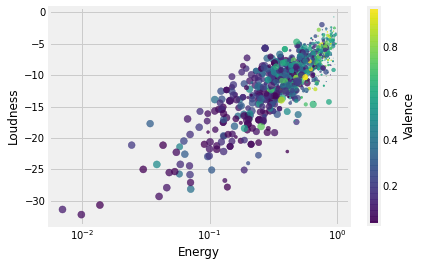

In [124]:
valence = sample['valence']
acousticness = sample['acousticness']

fig, ax = plt.subplots()

ax = plt.scatter(sample['energy'], sample['loudness'], c=valence, s=acousticness*50, alpha=0.75)
plt.xscale('log')
plt.xlabel('Energy')
plt.ylabel('Loudness')
cbar = plt.colorbar()
cbar.set_label('Valence')

In [273]:
rh = dupes[dupes['artist'] == 'Radiohead']
ir = rh[rh['album'] == 'In Rainbows']
amsp = rh[rh['album'] == 'A Moon Shaped Pool']

In [192]:
dates = sample.index

In [217]:
mask = (features.index > '2017-01-01') & (features.index <= '2017-01-08')

In [221]:
week = features.loc[mask]
week

,artist,track,album,release_date,genres,length,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,year-month,day,hour,dow
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-07 23:48:31,Rosechild,Sea Of Green,Remedies,2014-12-08,[],261779.0,1.0,0.343,0.717,D,-6.752,1.0,0.0610,0.000045,0.000882,0.3350,0.192,170.194,4.0,2017,1,2017-01,7,23,5
2017-01-07 23:39:48,Kygo,Id - Ultra Music Festival Anthem,ID (Ultra Music Festival Anthem),2015-02-10,"['edm', 'pop', 'tropical house']",289987.0,61.0,0.686,0.678,A♯/B♭,-8.063,1.0,0.0425,0.623000,0.719000,0.0971,0.338,105.005,4.0,2017,1,2017-01,7,23,5
2017-01-07 23:33:49,Sound Remedy,Spirals (feat. King Deco),Spirals (feat. King Deco),2015-05-17,"['chillstep', 'future bass', 'pop edm', 'vapor...",363176.0,30.0,0.236,0.574,C♯/D♭,-5.917,1.0,0.0363,0.028800,0.000000,0.1380,0.109,136.521,4.0,2017,1,2017-01,7,23,5
2017-01-07 23:28:52,The Killers,All These Things That I've Done,Hot Fuss,2004-06-15,"['modern rock', 'permanent wave', 'rock']",301573.0,66.0,0.557,0.728,F♯/G♭,-6.181,1.0,0.0405,0.001560,0.000005,0.1180,0.216,118.241,4.0,2017,1,2017-01,7,23,5
2017-01-07 23:23:52,Pokémon,Born To Be A Winner,Pokemon X - Ten Years Of Pokemon,2007-03-27,['cartoon'],47266.0,46.0,0.654,0.902,G,-3.232,0.0,0.1430,0.098000,0.000000,0.0758,0.962,145.172,4.0,2017,1,2017-01,7,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 06:01:09,Portishead,Roads,Dummy,1994-01-01,"['art pop', 'electronica', 'laboratorio', 'tri...",303973.0,63.0,0.607,0.294,F/E♯,-11.836,1.0,0.0764,0.778000,0.162000,0.1060,0.192,76.083,4.0,2017,1,2017-01,1,6,6
2017-01-01 05:56:08,Portishead,Roads,Dummy,1994-01-01,"['art pop', 'electronica', 'laboratorio', 'tri...",303973.0,63.0,0.607,0.294,F/E♯,-11.836,1.0,0.0764,0.778000,0.162000,0.1060,0.192,76.083,4.0,2017,1,2017-01,1,5,6
2017-01-01 05:53:35,Portishead,Roads,Dummy,1994-01-01,"['art pop', 'electronica', 'laboratorio', 'tri...",303973.0,63.0,0.607,0.294,F/E♯,-11.836,1.0,0.0764,0.778000,0.162000,0.1060,0.192,76.083,4.0,2017,1,2017-01,1,5,6


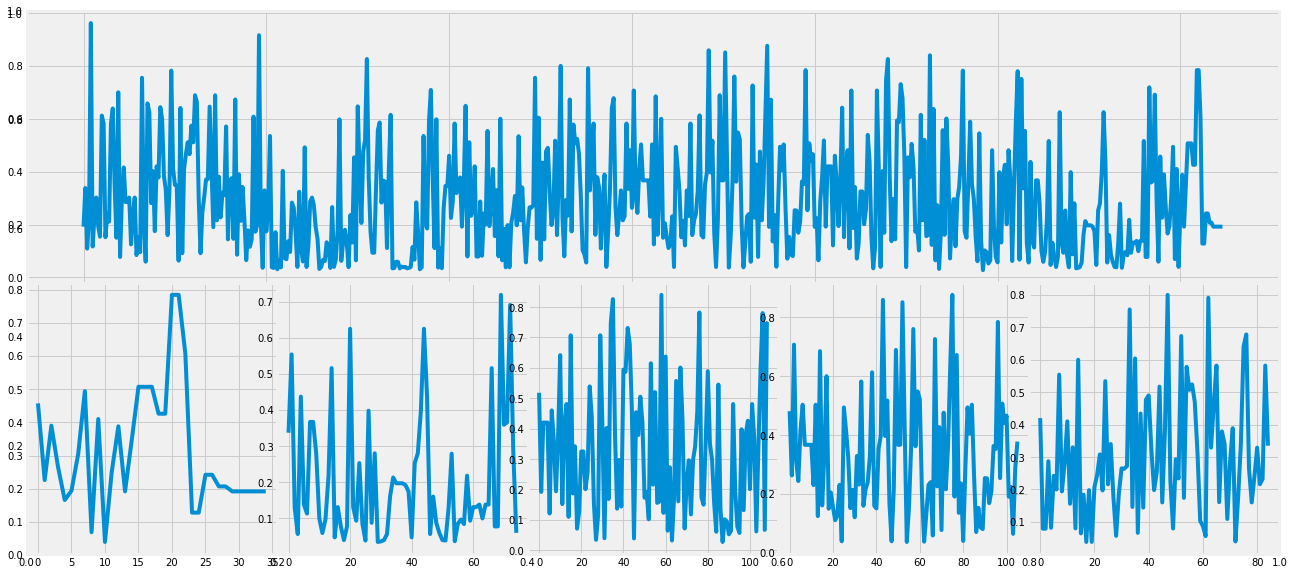

In [227]:
fig = plt.figure(figsize=(20,10))

grid = plt.GridSpec(2, 5, wspace=0, hspace=0)

plt.ylim(0,1)

mainax = fig.add_subplot(grid[0, :5])
ax1 = fig.add_subplot(grid[1, 0])
ax2 = fig.add_subplot(grid[1, 1])
ax3 = fig.add_subplot(grid[1, 2])
ax4 = fig.add_subplot(grid[1, 3])
ax5 = fig.add_subplot(grid[1, 4])

mainax.plot(week['valence'].values)
ax1.plot(week['2017-01-01']['valence'].values)
ax2.plot(week['2017-01-02']['valence'].values)
ax3.plot(week['2017-01-03']['valence'].values)
ax4.plot(week['2017-01-04']['valence'].values)
ax5.plot(week['2017-01-05']['valence'].values)